In [2]:
import pandas as pd #biblioteca para manipulação de dados
import matplotlib.pyplot as plt #bibloteca para plotar graficos

In [3]:
from google.colab import files
uploaded = files.upload()

Saving data-temps.csv to data-temps.csv


In [12]:
dataset = pd.read_csv('data-temps.csv', sep=',') 

In [13]:
dataset.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


*   year: ano de registro da temperatura
*   month: mês de registro da temperatura
*   day: dia de registro da temperatura
*   week: dia da semana em que a temperatura foi registrada
*   temp2: temperatura máxima obtida 2 dias antes do dia atual
*   temp1: temperatura máxima obtida 1 dia antes do dia atual
*   average: máxima média histórica
*   actual: temperatura máxima real
*   friend: previsão de um oráculo sobre a temperatura máxima


In [6]:
# Verificando o numero de amostras (linhas) e features (colunas) do dataset. 
print('Amostras e Features:', dataset.shape)

Amostras e Features: (348, 9)


In [7]:
# Verificando quais são os tipos das features
dataset.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average', 'actual',
       'friend'],
      dtype='object')

### Pré-Processamento

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb2652c590>,
      dtype=object)

<Figure size 1000x1000 with 0 Axes>

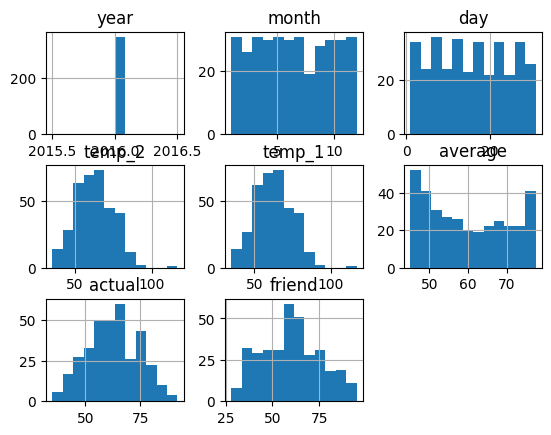

In [14]:
#Plot do histograma
plt.style.use('default') #define o formato a ser exibido para os gráficos
plt.figure(figsize=(10,10))  #definindo o tamanho das figuras
dataset.hist(bins=12)  #realizando o plot do histograma

         year     month       day  ...   average    actual    friend
year      NaN       NaN       NaN  ...       NaN       NaN       NaN
month     NaN  1.000000 -0.000412  ...  0.120806  0.004529  0.048145
day       NaN -0.000412  1.000000  ... -0.021136 -0.021675  0.024592
temp_2    NaN  0.047651 -0.046194  ...  0.821560  0.805835  0.583758
temp_1    NaN  0.032664 -0.000691  ...  0.819328  0.877880  0.541282
average   NaN  0.120806 -0.021136  ...  1.000000  0.848365  0.689278
actual    NaN  0.004529 -0.021675  ...  0.848365  1.000000  0.569145
friend    NaN  0.048145  0.024592  ...  0.689278  0.569145  1.000000

[8 rows x 8 columns]


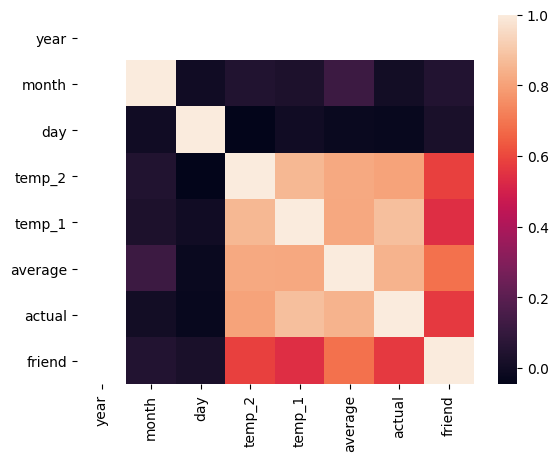

In [17]:
# procurando por correlações
import seaborn as sns #utilizada para constuir os gráficos em uma forma mais "bonita"
matriz_correlacao= dataset.corr() #encontra a matriz de correlação
print(matriz_correlacao) #print da matriz de correlação
sns.heatmap(matriz_correlacao) #realiza o plot da matriz de correlação através da função heatmap

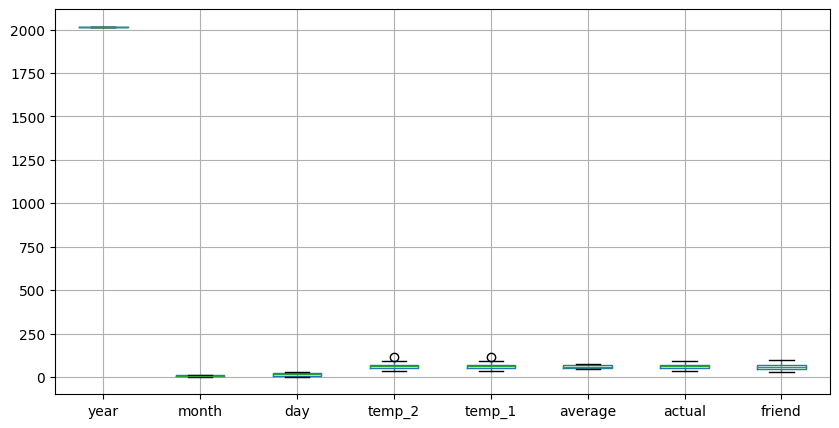

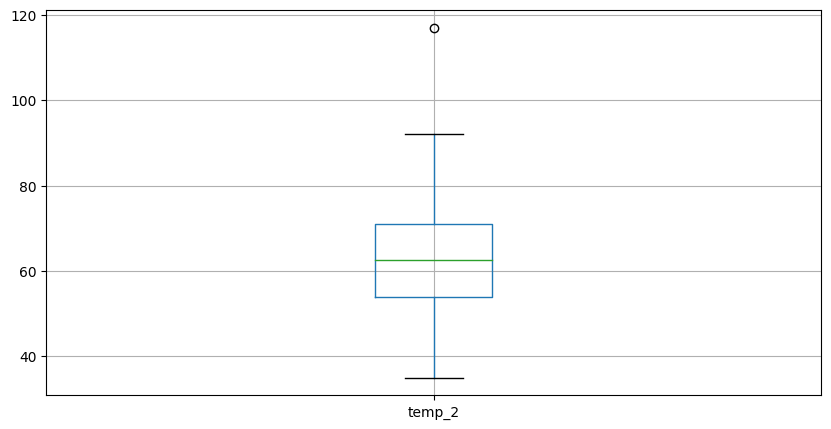

In [32]:
#encontrando outliers
plt.figure(figsize=(10,5))  #definindo o tamanho das figuras
dataset.boxplot() #realiza o boxplot dos dados
plt.figure(figsize=(10,5))  #definindo o tamanho das figuras
dataset.boxplot('temp_2') #realiza o boxplot dos dados

In [8]:
# binarizando a feature week
dataset = pd.get_dummies(dataset)

# visualizando o resultado
dataset.head(5)

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [9]:
# Analisando o resumo da base
dataset.describe()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,60.034483,0.143678,0.140805,0.143678,0.140805,0.140805,0.149425,0.140805
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,15.626179,0.351268,0.348321,0.351268,0.348321,0.348321,0.357021,0.348321
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


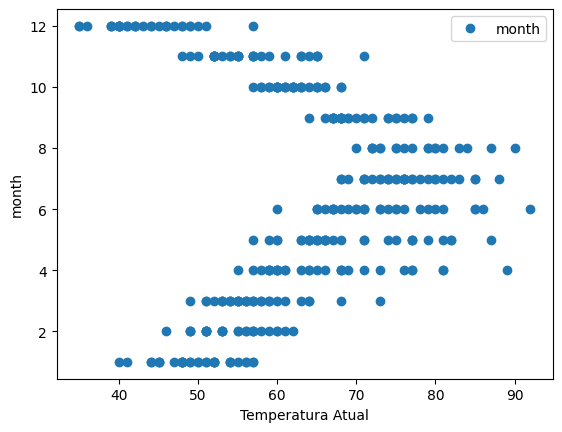

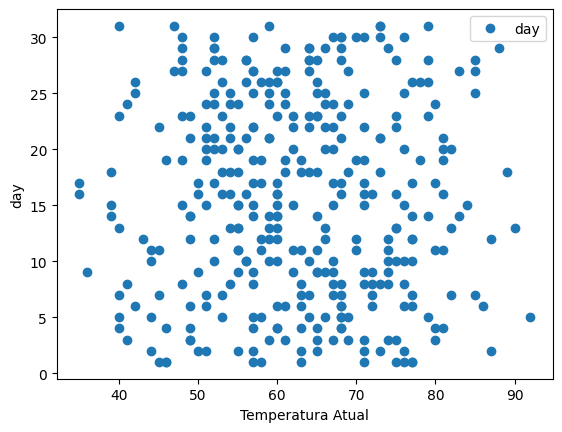

TypeError: ignored

In [29]:
#plotando gráficos de correlação das features
for i in dataset.columns[1:]:
    if(i != 'actual'):
        dataset.plot(x = 'actual', y = i, style='o') 
        plt.xlabel('Temperatura Atual')   
        plt.ylabel(i) 
        plt.show()

In [22]:
# armazenando os labels em um array
labels = np.array(dataset['actual'])

# salvando a ordem das features
feature_list = list(dataset.columns)

In [23]:
# removendo a coluna de labels do dataset original
dataset = dataset.drop('actual', axis = 1)

# check
dataset.columns

Index(['year', 'month', 'day', 'temp_2', 'temp_1', 'average', 'friend',
       'week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs',
       'week_Tues', 'week_Wed'],
      dtype='object')

In [25]:
# convertendo o dataset para array
data = np.array(dataset)

In [26]:
# importar train_test_split do scikitlearn 
from sklearn.model_selection import train_test_split

# aplicando a funcao train_test_split para separar os conjuntos de treino e 
# teste segundo uma porcentagem de separação definida. 
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.25, random_state = 42)